## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import seaborn as sns


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
overall_mouse_data_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
#mouse_metadata.count()
#study_results.count()
overall_mouse_data_df.head(12)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
#General Info
#overall_mouse_data_df.dtypes

In [3]:
# Cleaning Data - Checking for overall mouse count
mouse_count_df = overall_mouse_data_df.count()
#mouse_count_df

In [4]:
#Todo:  Find the duplicate mouse id

In [5]:
# Cleaning Data - Dropped the duplicate mouse data.
mouse_data_nodupes_df= overall_mouse_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_data_nodupes_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [6]:
#Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 1

#mouse_data_nodupes_df.groupby('Drug Regimen', as_index = True)["Tumor Volume (mm3)"].describe()
var_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
med_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
std_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
men_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
sem_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

#stats_df
#var_stat
#med_stat
#std_stat
#men_stat
#sem_stat

drug_stat_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
drug_stat_df

,Variance,Median,Mean,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,24.947764,41.557809,40.675741,4.994774,0.329346
Ceftamin,39.290177,51.776157,52.591172,6.268188,0.469821
Infubinol,43.128684,51.820584,52.884795,6.567243,0.492236
Ketapril,68.553577,53.698743,55.235638,8.279709,0.603860
Naftisol,66.173479,52.509285,54.331565,8.134708,0.596466
Placebo,61.168083,52.288934,54.033581,7.821003,0.581331
Propriva,43.138803,50.909965,52.393463,6.568014,0.525862
Ramicane,23.486704,40.673236,40.216745,4.846308,0.320955
Stelasyn,59.450562,52.431737,54.233149,7.710419,0.573111


In [7]:
##Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 2
 
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_stat_v2_df = mouse_data_nodupes_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
#drug_stat_v2_df

## Bar and Pie Charts

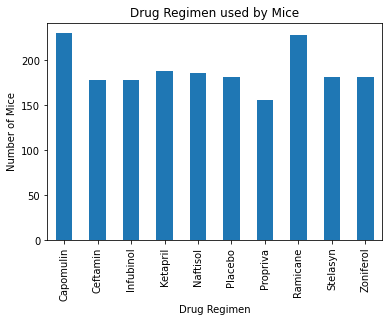

In [8]:
# Bar Chart - Count of Mice Using Drug Regimen - with Pandas Dataframe
users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()

#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
users_df.plot(kind="bar")
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

NameError: name 'drug_regemin' is not defined

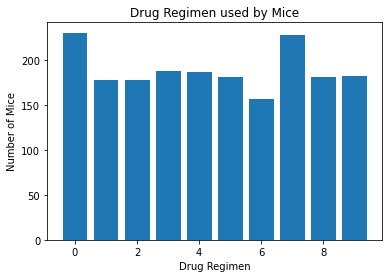

In [9]:
reset_user_df= users_df.reset_index()
x_data = range(len(reset_user_df["Mouse ID"]))
y_data = reset_user_df["Mouse ID"]
plt.bar(x_data, y_data)
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(x_data, drug_regemin)
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

In [10]:
#x_data = mouse_data_nodupes_df['Drug Regimen']
#data = mouse_data_nodupes_df['Mouse ID'].count()

#x_data
#data
#plot.bar(x_data,data); plt.xticks(x,('Drug Regimen'))

NameError: name 'drug_regemin' is not defined

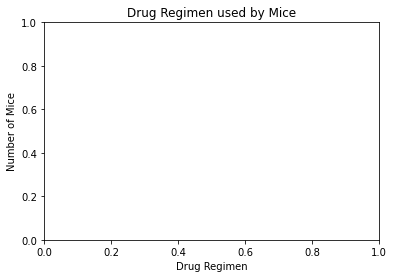

In [11]:
# Bar Chart - Count of Mice Using Drug Regimen - with Matplotlib 
#users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
#drug_regemin = mouse_data_nodupes_df["Drug Regimen"].unique()
#number_of_mice = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
#number_of_mice=[230,9,5,2,1,4,4,4,2,8]
#x_axis = np.arange(0, len('drug_regemin'))
#tick_location = []
#for x in x_axis:
 #   tick_location.append(x)


plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drug_regemin)-.25)
plt.ylim(0, 200)

plt.bar(number_of_mice, drug_regemin, facecolor="blue", alpha=0.75, align="center")
#tick_location = [value for value in drug_regemin]
#plt.xticks(drug_regemin, tick_location)
plt.show()
#Todo:  Passing in the drugs and counts as lists.  


In [12]:
number_of_mice = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
number_of_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [13]:
plt.bar(x_axis, number_of_mice, color='b', alpha = 1, align = 'center')

plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

NameError: name 'x_axis' is not defined

In [14]:
plt.xticks(x_axis, drug_regemin)

#plt.bar(x_axis, drug_regemin)


NameError: name 'x_axis' is not defined

In [15]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
gender_of_mice = mouse_data_nodupes_df["Sex"].value_counts()
gender_of_mice_df = pd.DataFrame(gender_of_mice)
gender_of_mice_df['Gender_pct'] = (gender_of_mice_df.Sex / (gender_of_mice_df.Sex.sum()/100)).round(decimals=2)
renamed_genders_of_mice_df = gender_of_mice_df.rename(columns={"Sex":"Total Count", "Gender_pct":"Percentage of Mice"})
def format(x):
    return "{:.2f}%".format(x)
renamed_genders_of_mice_df['Percentage of Mice'] = renamed_genders_of_mice_df['Percentage of Mice'].apply(format)
renamed_genders_of_mice_df


,Total Count,Percentage of Mice
Male,958,50.74%
Female,930,49.26%


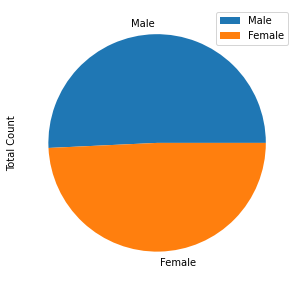

In [16]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
#renamed_genders_of_mice_df.plot(kind="pie")
plot=renamed_genders_of_mice_df.plot.pie(y='Total Count', figsize=(5, 5))
#plt.show()

([<matplotlib.patches.Wedge at 0x1fdd854f160>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

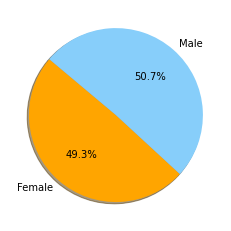

In [17]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
user_counts = mouse_data_nodupes_df.groupby('Sex')['Mouse ID'].count().reset_index()
users = user_counts
label = user_counts["Sex"]
colors = ["orange", "lightskyblue"]
explode = (0.1, 0, 0, 0)
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))
# Tells matplotlib to seperate the "Humans" section from the others

plt.pie(users["Mouse ID"], labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#users = mouse_data_nodupes_df.("Mouse ID").count
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")


In [18]:
user_counts.head()

,Sex,Mouse ID
0,Female,930
1,Male,958


ValueError: could not convert string to float: 'Female'

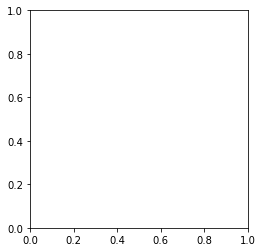

In [19]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
#sex = mouse_data_nodupes_df.groupby(["Sex"])
sex = mouse_data_nodupes_df.groupby(["Sex"])

# The values of each section of the pie chart
sizes = mouse_data_nodupes_df["Sex"].count()

# The colors of each section of the pie chart
colors = ["red", "blue"]
explode = (0.1, 0)  
plt.pie(sex, labels=sizes, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Treatment Impact by Sex")
#plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
#sort least to most and pick the last.
drug_list=['Capomulin','Ramicane','Infubinol','Placebo']
mouse_data_nodupes_df= mouse_data_nodupes_df.sort_values("Timepoint")
last_timepoints_df = mouse_data_nodupes_df.groupby("Mouse ID").last()
Capomulin_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Capomulin"]
#Capomulin_df

In [54]:
Ramicane_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Ramicane"]
#Ramicane_df

In [55]:
Infubinol_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Infubinol"]
#Infubinol_df

In [56]:
Placebo_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Placebo"]
#Placebo_df

In [57]:
tumor_vols = [Capomulin_df['Tumor Volume (mm3)'],Ramicane_df['Tumor Volume (mm3)'],Infubinol_df['Tumor Volume (mm3)'],Placebo_df['Tumor Volume (mm3)']]
tumor_vols

[Mouse ID
 b128    38.982878
 b742    38.939633
 f966    30.485985
 g288    37.074024
 g316    40.159220
 i557    47.685963
 i738    37.311846
 j119    38.125164
 j246    38.753265
 l509    41.483008
 l897    38.846876
 m601    28.430964
 m957    33.329098
 r157    46.539206
 r554    32.377357
 r944    41.581521
 s185    23.343598
 s710    40.728578
 t565    34.455298
 u364    31.023923
 v923    40.658124
 w150    39.952347
 w914    36.041047
 x401    28.484033
 y793    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 Mouse ID
 a411    38.407618
 a444    43.047543
 a520    38.810366
 a644    32.978522
 c458    38.342008
 c758    33.397653
 d251    37.311236
 e662    40.659006
 g791    29.128472
 i177    33.562402
 i334    36.374510
 j913    31.560470
 j989    36.134852
 k403    22.050126
 m546    30.564625
 n364    31.095335
 q597    45.220869
 q610    36.561652
 r811    37.225650
 r921    43.419381
 s508    30.276232
 u196    40.667713
 w678    43.166373
 y449    44.183451
 z578 

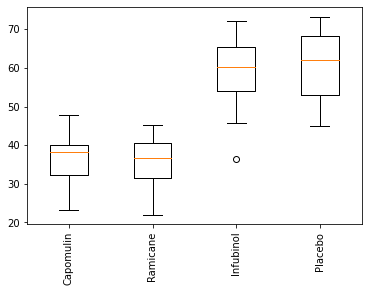

In [58]:
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vols)
plt.xticks(range(1,len(drug_list)+1), drug_list, rotation = 90)
plt.show()


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#forlabel, row in df.iterrows():

#create a list of the four drugs we care about

#loop through each of the four drugs

for drug in drug_list:

    #Create a small dataframe of ONE drug off of our main dataframe
    drug_list_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]

    #group the mice togeteher within the small dataframe
    grouped = drug_list_df.groupby('Mouse ID')

    #loop through the groups of mice
    for name, group in grouped:    
        max_value=group['Timepoint'].argmax()
        tumor_vol =group.iloc[max_value]['Tumor Volume (mm3)']
        mouse_id=group.iloc[max_value]['Mouse ID']
        print ((drug), (mouse_id),  (tumor_vol))

#Initial code for finding the desired data from one mouse
#b128_df = mouse_data_nodupes_df.loc[mouse_data_nodupes_df['Mouse ID'] == 'g107']
#max_value=b128_df['Timepoint'].argmax()
#tumor_vol =b128_df.iloc[max_value]['Tumor Volume (mm3)']
#tumor_vol
#b128_df

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Have the data in a dataframe of what I need.  Don't need to merge back into dataframe

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vols)
plt.xticks(range(1,len(treatments)+1), treatments, rotation = 90)
plt.show()


## Line and Scatter Plots

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
tumor_capomulin_df = mouse_data_nodupes_df[mouse_data_nodupes_df["Drug Regimen"] == "Capomulin"]
tumor_capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1673,j246,0,45.000000,0,Capomulin,Female,21,21
1691,s185,0,45.000000,0,Capomulin,Female,3,17
1681,r554,0,45.000000,0,Capomulin,Female,8,17
1755,j119,0,45.000000,0,Capomulin,Female,7,23
...,...,...,...,...,...,...,...,...
1710,b742,45,38.939633,0,Capomulin,Male,7,21
1700,s185,45,23.343598,1,Capomulin,Female,3,17
1764,j119,45,38.125164,1,Capomulin,Female,7,23
1754,u364,45,31.023923,3,Capomulin,Male,18,17


In [76]:
b128_df = tumor_capomulin_df.loc[tumor_capomulin_df['Mouse ID'] == 'b128']
#x_plot_capomulin = b128_df ["Timepoint"]
#y_plot_capomulin = b128_df ["Tumor Volume (mm3)"

b128_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


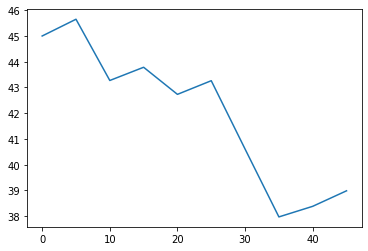

In [77]:
#todos label graph.
plt.plot(b128_df["Timepoint"],b128_df["Tumor Volume (mm3)"])

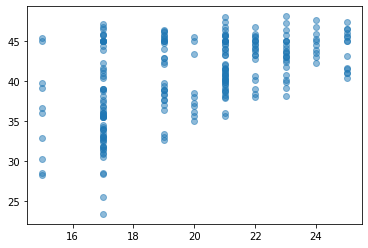

In [81]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#ToDos:  Add labels
#all_capomulin_df = (tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)
plt.scatter(tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)

## Correlation and Regression

Reference - Matplotlib - Day 3 - Activity 6 and 7 - For correlation examples
Reference - Matplotlib - Day 3 - Activity 8 for REgression


Regression Line Example from Activity 8:  
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) - This won't work now.  stats.linregress or st.linregress
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

Correlation - Formula - example from Activity 6:
Correlation Example:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

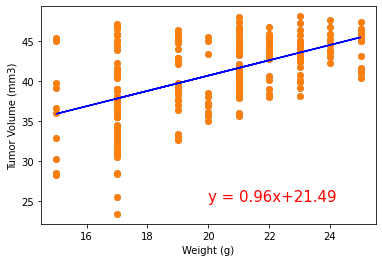

In [108]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
plt.scatter(tumor_capomulin_df["Weight (g)"], tumor_capomulin_df["Tumor Volume (mm3)"], alpha = 0.5)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tumor_capomulin_df["Weight (g)"],tumor_capomulin_df ["Tumor Volume (mm3)"])
regress_values = (tumor_capomulin_df["Weight (g)"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
#line_eq = "hello"
plt.scatter(tumor_capomulin_df["Weight (g)"],tumor_capomulin_df ["Tumor Volume (mm3)"])
plt.plot(tumor_capomulin_df["Weight (g)"],regress_values,"b-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


In [91]:

correlation = st.pearsonr(mouse_data_nodupes_df["Weight (g)"],mouse_data_nodupes_df ["Tumor Volume (mm3)"])[0] 
correlation
print(f"The correlation between Weight(g) of the Tumor Volume (mm3) is {round(correlation,2)}")

The correlation between Weight(g) of the Tumor Volume (mm3) is 0.59
